In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
pd.set_option('display.max_columns', None)
%matplotlib inline

## Data

The **demographics** dataset contains information related to the population statistics for each region.

#### Background research

To give clarity to the dataset, the definition of some attributes are listed below. Note that some atrributes are self-explanatory and are thus excluded.

**population_clustered** - population for regions of more than 1 million

**population_density** - population per squared kilometer of land area

**human_development_index** - measure of the region's social and economic development, associating life expectancy, education, and per capita income indicators

## Read data

#### Read .csv files

To prevent Pandas from recognizing the string "NA" (which represents the country Namibia) as a null value, set the argument *keep_default_na* to False and pass a list of values to be interpreted as null (which excludes "NA") to *na_values* when reading the CSV file.

In [11]:
#Exclude "NA" from list of na_values
na_values = ["","#N/A","#N/A N/A","#NA","-1.#IND","-1.#QNAN","-NaN","-nan","1.#IND","1.#QNAN","<NA>","N/A","NULL","NaN","n/a","nan","null"]

#Read csv
demographics = pd.read_csv('data/demographics.csv', keep_default_na=False, na_values=na_values)
demographics.head()

,location_key,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,77265.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
3,AF_BAL,1509183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF_BAM,495557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Select data

**location_key** is a unique identifier for the country and subregions that can be used to merge all the datasets and correlate selected information from these datasets. 

Of the 19 columns in the **demographics** dataset, only the columns **location_key**, **population**, **population_clustered**, **population_density**, and **human_development_index** seem necessary for the analysis of COVID-related cases. The rest of the columns can be dropped from the dataset. 

In [12]:
demographics_attributes = ['location_key', 'population', 'population_clustered', 'population_density' ,'human_development_index']
demographics = demographics.loc[:,demographics_attributes]
demographics.head()

,location_key,population,population_clustered,population_density,human_development_index
0,AD,77265.0,NaN,164.394,0.858
1,AE,9890400.0,5914068.0,118.306,0.863
2,AF,38928341.0,4114030.0,59.627,0.498
3,AF_BAL,1509183.0,NaN,NaN,NaN
4,AF_BAM,495557.0,NaN,NaN,NaN


Only the **data per country** are necessary, therefore remove all rows for subregions, which are denoted by the locations with "_" under the **location_key** column:

In [16]:
demographics = demographics[demographics['location_key'].str.contains("_") == False].reset_index(drop=True)
demographics.head()

,location_key,population,population_clustered,population_density,human_development_index
0,AD,77265.0,NaN,164.394,0.858
1,AE,9890400.0,5914068.0,118.306,0.863
2,AF,38928341.0,4114030.0,59.627,0.498
3,AG,97928.0,NaN,222.564,0.780
4,AI,15002.0,NaN,166.689,NaN


## Prepare data

#### Check data types

The **location_key** column is an object while the four numeric columns of the **demographics** dataset are all floating point numbers. 

While the metadata indicates that **population** and **population_clustered** are integers (and population data is inherently an integer), their data types are still float64 due to the presence of null values in these columns. 

In [17]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location_key             246 non-null    object 
 1   population               245 non-null    float64
 2   population_clustered     121 non-null    float64
 3   population_density       230 non-null    float64
 4   human_development_index  186 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.7+ KB


Change the data type of **location_key** to string:

In [18]:
demographics = demographics.astype({'location_key':'string'})
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location_key             246 non-null    string 
 1   population               245 non-null    float64
 2   population_clustered     121 non-null    float64
 3   population_density       230 non-null    float64
 4   human_development_index  186 non-null    float64
dtypes: float64(4), string(1)
memory usage: 9.7 KB


#### Check unique values

Check that **location_key** column only has unique values for each row to ensure that no country is duplicated:

In [19]:
demographics['location_key'].is_unique

True

#### Check for missing values

All columns in the dataset except location_key have missing values:

In [20]:
demographics.isna().sum()

location_key                 0
population                   1
population_clustered       125
population_density          16
human_development_index     60
dtype: int64

##### Check missing values of population column

In [21]:
demographics[demographics['population'].isna()]

,location_key,population,population_clustered,population_density,human_development_index
196,SJ,NaN,NaN,NaN,NaN


##### Check missing values of population_clustered column

Since **population_clustered** is available only for countries with a population of more than 1 million, check only missing values for these countries and expect missing values for the rest. 


In [28]:
demographics_onemillion = demographics[demographics['population'] > 1000000]
demographics_onemillion[demographics_onemillion['population_clustered'].isna()]

,location_key,population,population_clustered,population_density,human_development_index
5,AL,2862427.0,NaN,99.600,0.764
16,BA,3280815.0,NaN,64.330,0.733
22,BH,1701583.0,NaN,2238.925,0.824
23,BI,11890781.0,NaN,463.037,0.417
24,BJ,12123198.0,NaN,107.513,0.515
33,BW,2351625.0,NaN,4.149,0.717
39,CF,4829764.0,NaN,7.753,0.367
62,EE,1324820.0,NaN,30.400,0.892
65,ER,3546427.0,NaN,35.113,0.440
74,GA,2225728.0,NaN,8.638,0.702


##### Check missing values of population_density column

##### Check missing values of human_development_index column

In [30]:
demographics[demographics['population_density'].isna()]

,location_key,population,population_clustered,population_density,human_development_index
7,AN,197041.0,NaN,NaN,NaN
9,AQ,4400.0,NaN,NaN,NaN
32,BV,0.0,NaN,NaN,NaN
37,CC,596.0,NaN,NaN,NaN
52,CX,1843.0,NaN,NaN,NaN
79,GG,63276.0,NaN,NaN,NaN
87,GS,30.0,NaN,NaN,NaN
93,HM,0.0,NaN,NaN,NaN
103,IO,4000.0,NaN,NaN,NaN
108,JE,105500.0,NaN,NaN,NaN


In [29]:
demographics[demographics['human_development_index'].isna()]

,location_key,population,population_clustered,population_density,human_development_index
4,AI,15002.0,NaN,166.689,NaN
7,AN,197041.0,NaN,NaN,NaN
9,AQ,4400.0,NaN,NaN,NaN
11,AS,55197.0,NaN,275.985,NaN
14,AW,106766.0,NaN,593.144,NaN
25,BM,62273.0,NaN,1245.460,NaN
28,BQ,26221.0,NaN,79.942,NaN
32,BV,0.0,NaN,NaN,NaN
37,CC,596.0,NaN,NaN,NaN
43,CK,17564.0,NaN,73.183,NaN


#### Handle missing values

#### Check for outliers and out-of-range values

The descriptive statistics, including the central tendency, dispersion and shape of a dataset’s distribution, are shown below. 

In [32]:
demographics.describe().applymap("{0:.2f}".format)

,population,population_clustered,population_density,human_development_index
count,245.00,121.00,230.00,186.00
mean,31676743.00,14896237.52,475.65,0.71
std,132430008.98,44086931.88,2358.94,0.15
min,0.00,1026758.00,0.14,0.35
25%,285491.00,1775933.00,36.74,0.59
50%,5057677.00,3137690.00,92.85,0.73
75%,19129955.00,9877181.00,233.26,0.82
max,1439323774.00,398976116.00,26338.26,0.96


Use a boxplot to detect outliers in the dataset:

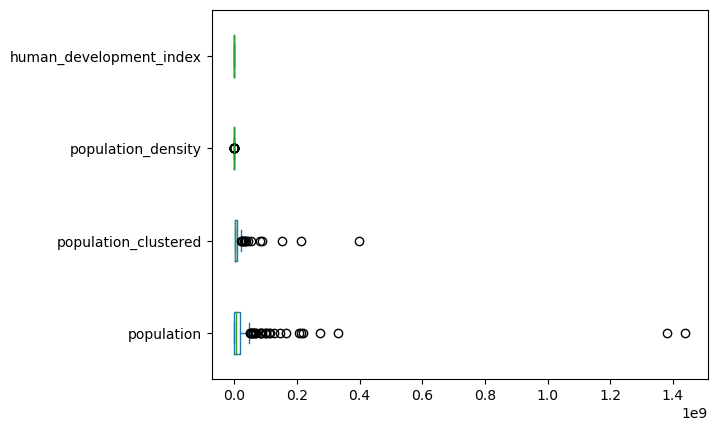

In [33]:
demographics.plot.box(vert=False)
plt.show()

#### Check for duplicates